# Keras：MNIST手寫數字辨識

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()


In [0]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)


x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [0]:
import pandas as pd

pd.DataFrame(x_train[0])


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


這個是: 5


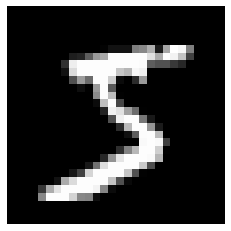

In [0]:
import matplotlib.pylab as plt

%matplotlib inline
print("這個是:", y_train[0])
plt.axis("off")
plt.imshow(x_train[0], cmap="gray")


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 784 * 64 + 64(bias) = 50240，bias是從梯度下降得來的
model.add(Dense(256, activation="relu", input_dim=784))

# 64 * 10 + 10(bias) = 650 
model.add(Dense(10, activation="softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(loss=CategoricalCrossentropy(),
              optimizer="adam", 
              metrics=["accuracy"])


In [0]:
# 答案預處理
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print("原本：", y_train[2])
print("處理：", y_train_cat[2])


原本： 4
處理： [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [0]:
# -1: 自動計算(一個位置)
# 圖片: 1D -> /255(normalize)
x_train_norm = x_train.reshape(-1, 784) /255
x_test_norm = x_test.reshape(-1, 784) /255


In [0]:
# batch_size: 看多少筆資料做一次梯度下降(圖片不大: 100~200, 圖片大: 10~20)
# validation_split: 切出一部分作為驗證資料
# epochs: 整份資料集看多少遍
# 一個epochs做了 54000 / 200 = 270 次梯度下降
# verbose(選用): 0(Quiet), 1(Noisy), 2(Normal)
model.fit(x_train_norm, 
          y_train_cat, 
          batch_size=200, 
          validation_split=0.1, 
          epochs=15, 
          verbose=2)


Train on 54000 samples, validate on 6000 samples
Epoch 1/2
54000/54000 - 1s - loss: 0.0032 - accuracy: 0.9997 - val_loss: 0.0729 - val_accuracy: 0.9823
Epoch 2/2
54000/54000 - 1s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0731 - val_accuracy: 0.9817


In [0]:
# 只要還在tf裡，請帶入one-hot encoding
model.evaluate(x_test_norm, y_test_cat, verbose=2)


10000/1 - 0s - loss: 0.0388 - accuracy: 0.9767


[0.07721859378907829, 0.9767]

In [0]:
# predict: 給機率   predict_classes: 給類別
pre = model.predict_classes(x_test_norm)
pre


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [0]:
# 不是在tf裡，帶入原本的y

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
c = ["{}(預測)".format(i) for i in range(10)]
i = ["{}(真實)".format(i) for i in range(10)]
pd.DataFrame(mat, columns=c, index=i)


,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),969,1,0,0,2,0,4,1,3,0
1(真實),0,1125,3,1,0,1,2,1,2,0
2(真實),4,0,1015,1,1,0,2,5,4,0
3(真實),0,0,4,991,0,3,0,4,5,3
4(真實),1,0,1,1,963,0,4,3,1,8
5(真實),2,0,0,8,1,869,6,1,3,2
6(真實),2,2,1,1,3,3,944,0,2,0
7(真實),0,4,7,1,0,0,0,1009,3,4
8(真實),4,0,4,6,2,2,2,6,947,1
9(真實),0,2,0,5,7,4,1,5,3,982


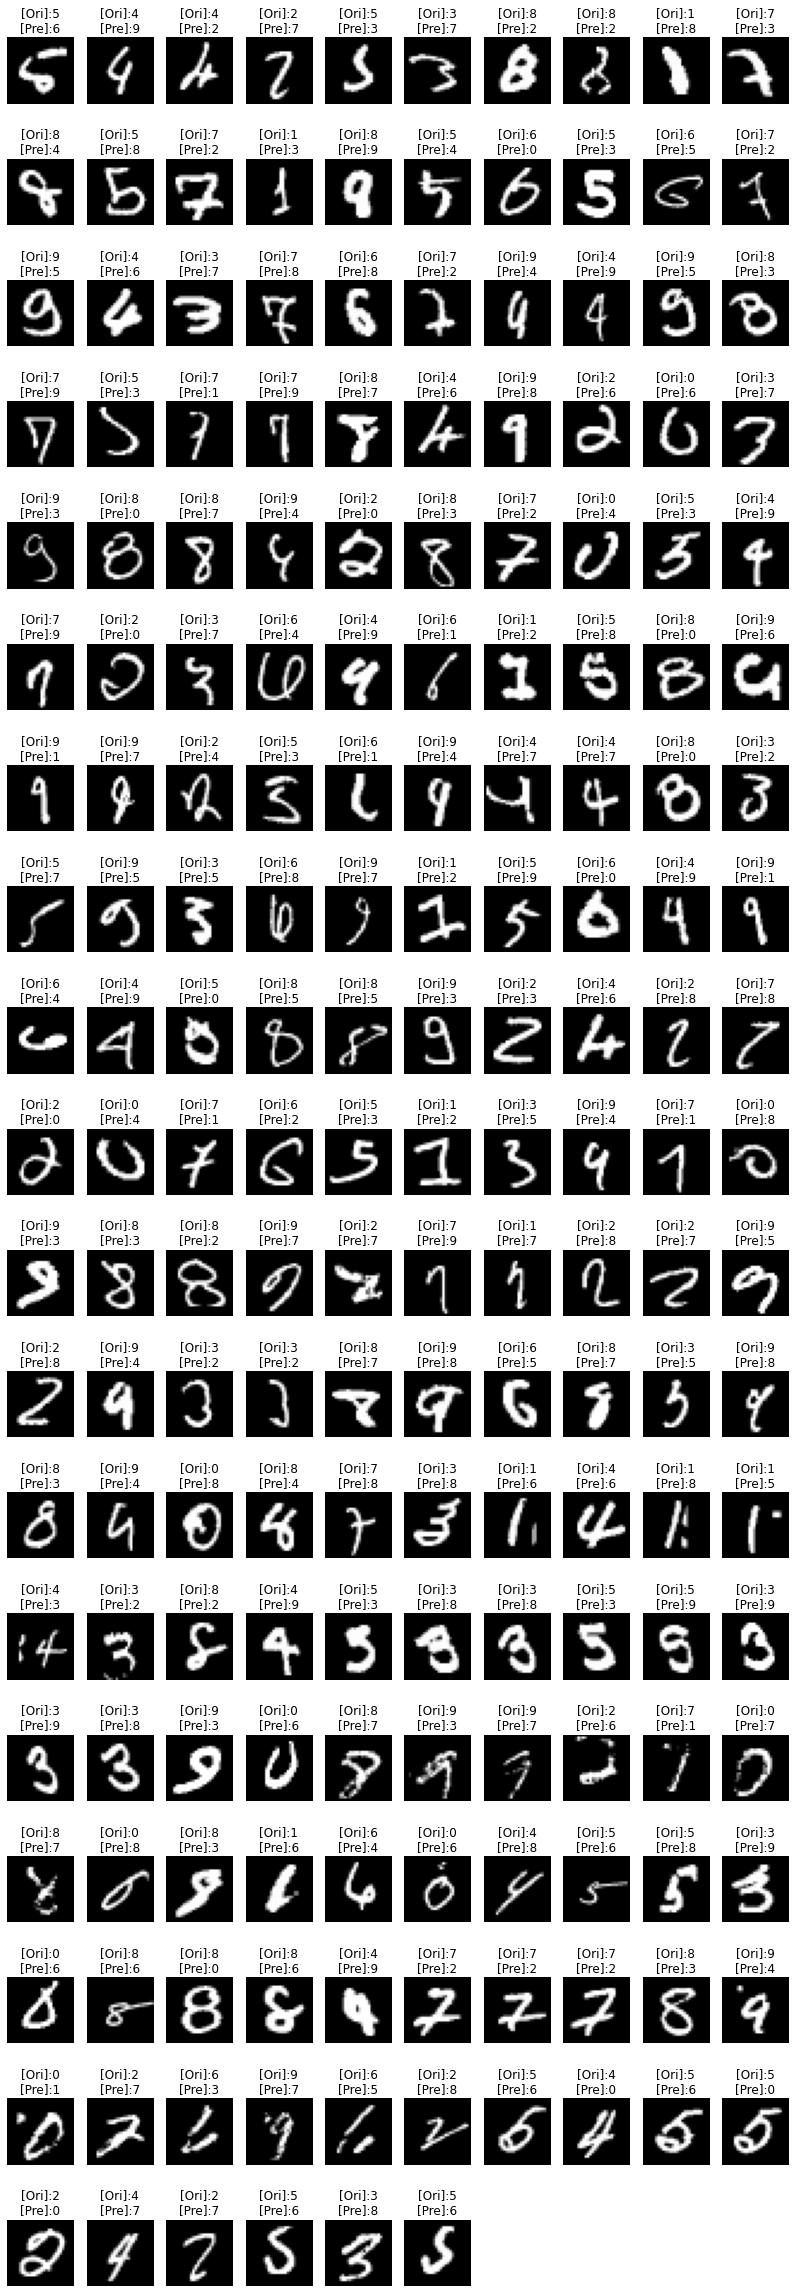

In [0]:
import numpy as np

# nonzero: 取出是True的index
# (x座標, y座標, z座標)
idx = np.nonzero(pre != y_test)[0]

#預測錯誤的圖
false_img = x_test[idx]
false_answer = y_test[idx]
false_predict = pre[idx]

# 把圖變大一點才塞的下
plt.figure(figsize=(14, 42))
width = 10
height = len(false_img) // width + 1

for i, img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    plt.axis("off")
    t = "[Ori]:{}\n[Pre]:{}".format(false_answer[i], 
                                    false_predict[i])
    plt.title(t)
    plt.imshow(img, cmap="gray")


輸入檔名:test_2.png
應該是: 5


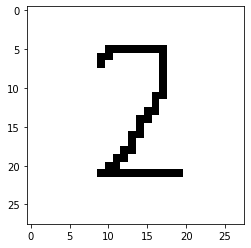

In [0]:
from tensorflow.keras.preprocessing.image import load_img

fn = input("輸入檔名:")
img = load_img(fn, target_size=(28, 28)).convert("L")
# 剛剛帶入 (10000, 784)
# 現在帶入 (1, 784)
img_norm = np.array(img).reshape(1, 784) / 255
ans = model.predict_classes(img_norm)[0]
print("應該是:", ans)
plt.imshow(img, cmap="gray")